In [10]:
import math
import numpy as np
import random
import csv
import matplotlib.pyplot as plt
import pandas as pd
import json 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.signal import find_peaks

from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from BaselineRemoval import BaselineRemoval
from sklearn.metrics import mean_squared_error

from scipy import signal
from sklearn.tree import DecisionTreeRegressor 

from scipy.signal import argrelextrema
from sklearn.preprocessing import PolynomialFeatures
from scipy import interpolate
import bisect

In [11]:
centre = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\V3\\test1_centre.csv")
force_centre = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\DATA - 4 sensors dummy tummy\\test#1 centre.log", delimiter = "\t")

In [12]:
force_centre

,Reading,Load,Time,Unnamed: 3
0,1,0.02,0.000,NaN
1,2,0.02,0.049,NaN
2,3,0.02,0.099,NaN
3,4,0.02,0.149,NaN
4,5,0.02,0.199,NaN
...,...,...,...,...
9887,9888,0.02,808.799,NaN
9888,9889,0.02,808.999,NaN
9889,9890,0.02,809.049,NaN
9890,9891,0.02,809.250,NaN


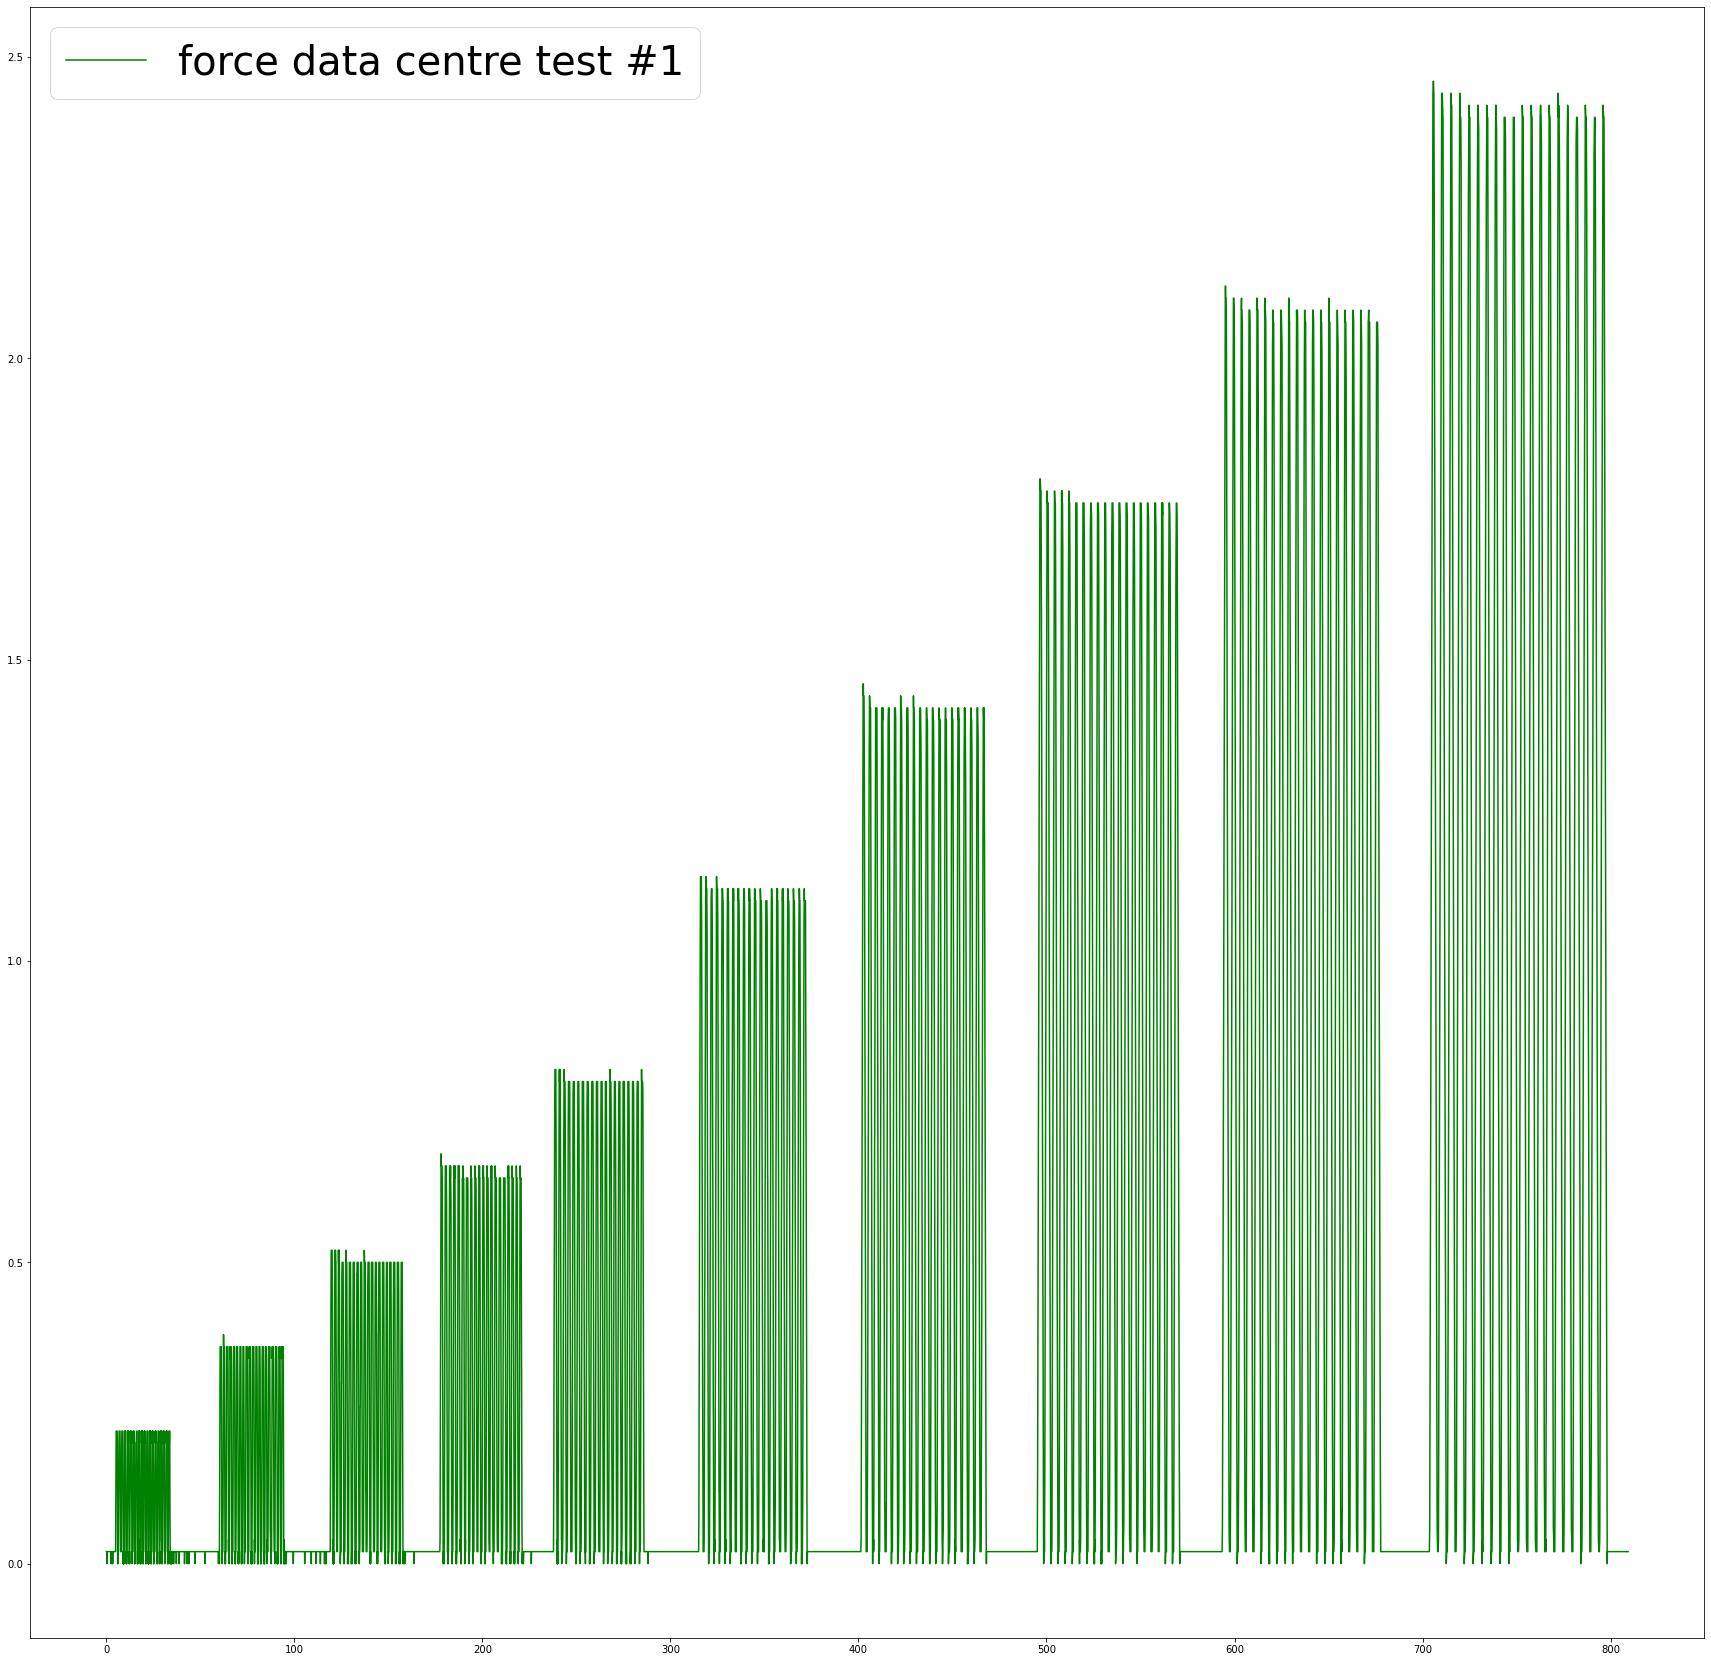

In [13]:
#Plotting the force data - test #1 centre
plt.figure(figsize=(30, 30))
x_force = force_centre["Time"]
Load_centre = force_centre["Load"]
plt.plot(x_force,Load_centre,color = 'green', label = 'force data centre test #1' )
x_force.shape
plt.legend(fontsize=40)

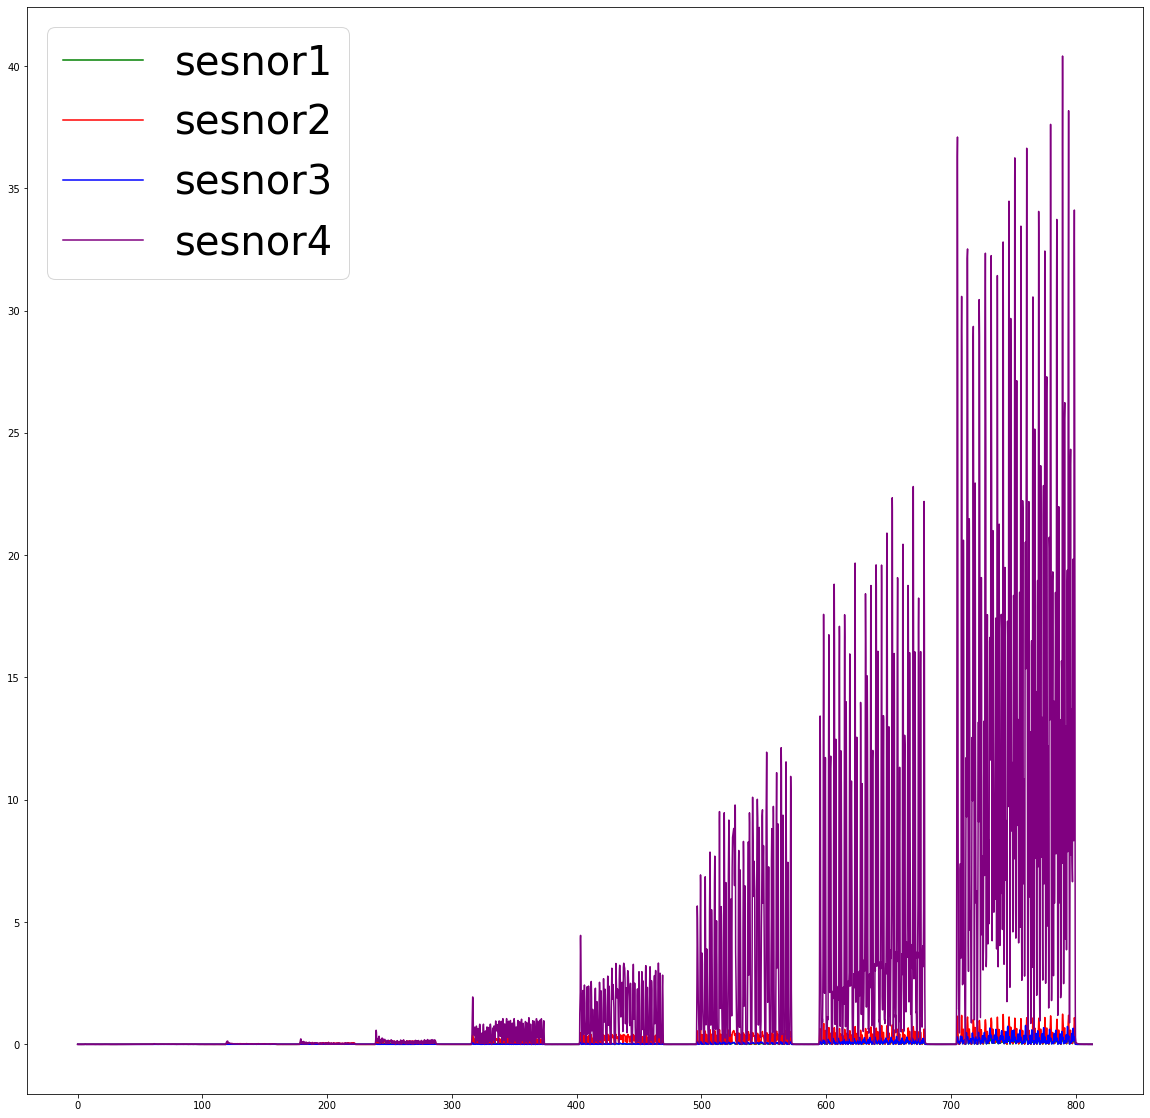

In [15]:
#Plotting the resistance data for test #1 - centre
plt.figure(figsize=(20, 20))
plt.plot(centre["Unnamed: 0"],centre["s1_d"], color = 'green', label = 'sesnor1')
plt.plot(centre["Unnamed: 0"],centre["s2_d"], color = 'red', label = 'sesnor2')
plt.plot(centre["Unnamed: 0"],centre["s3_d"], color = 'blue', label = 'sesnor3')
plt.plot(centre["Unnamed: 0"],centre["s4_d"], color = 'purple', label = 'sesnor4')
centre["Unnamed: 0"].shape
plt.legend(fontsize=40)

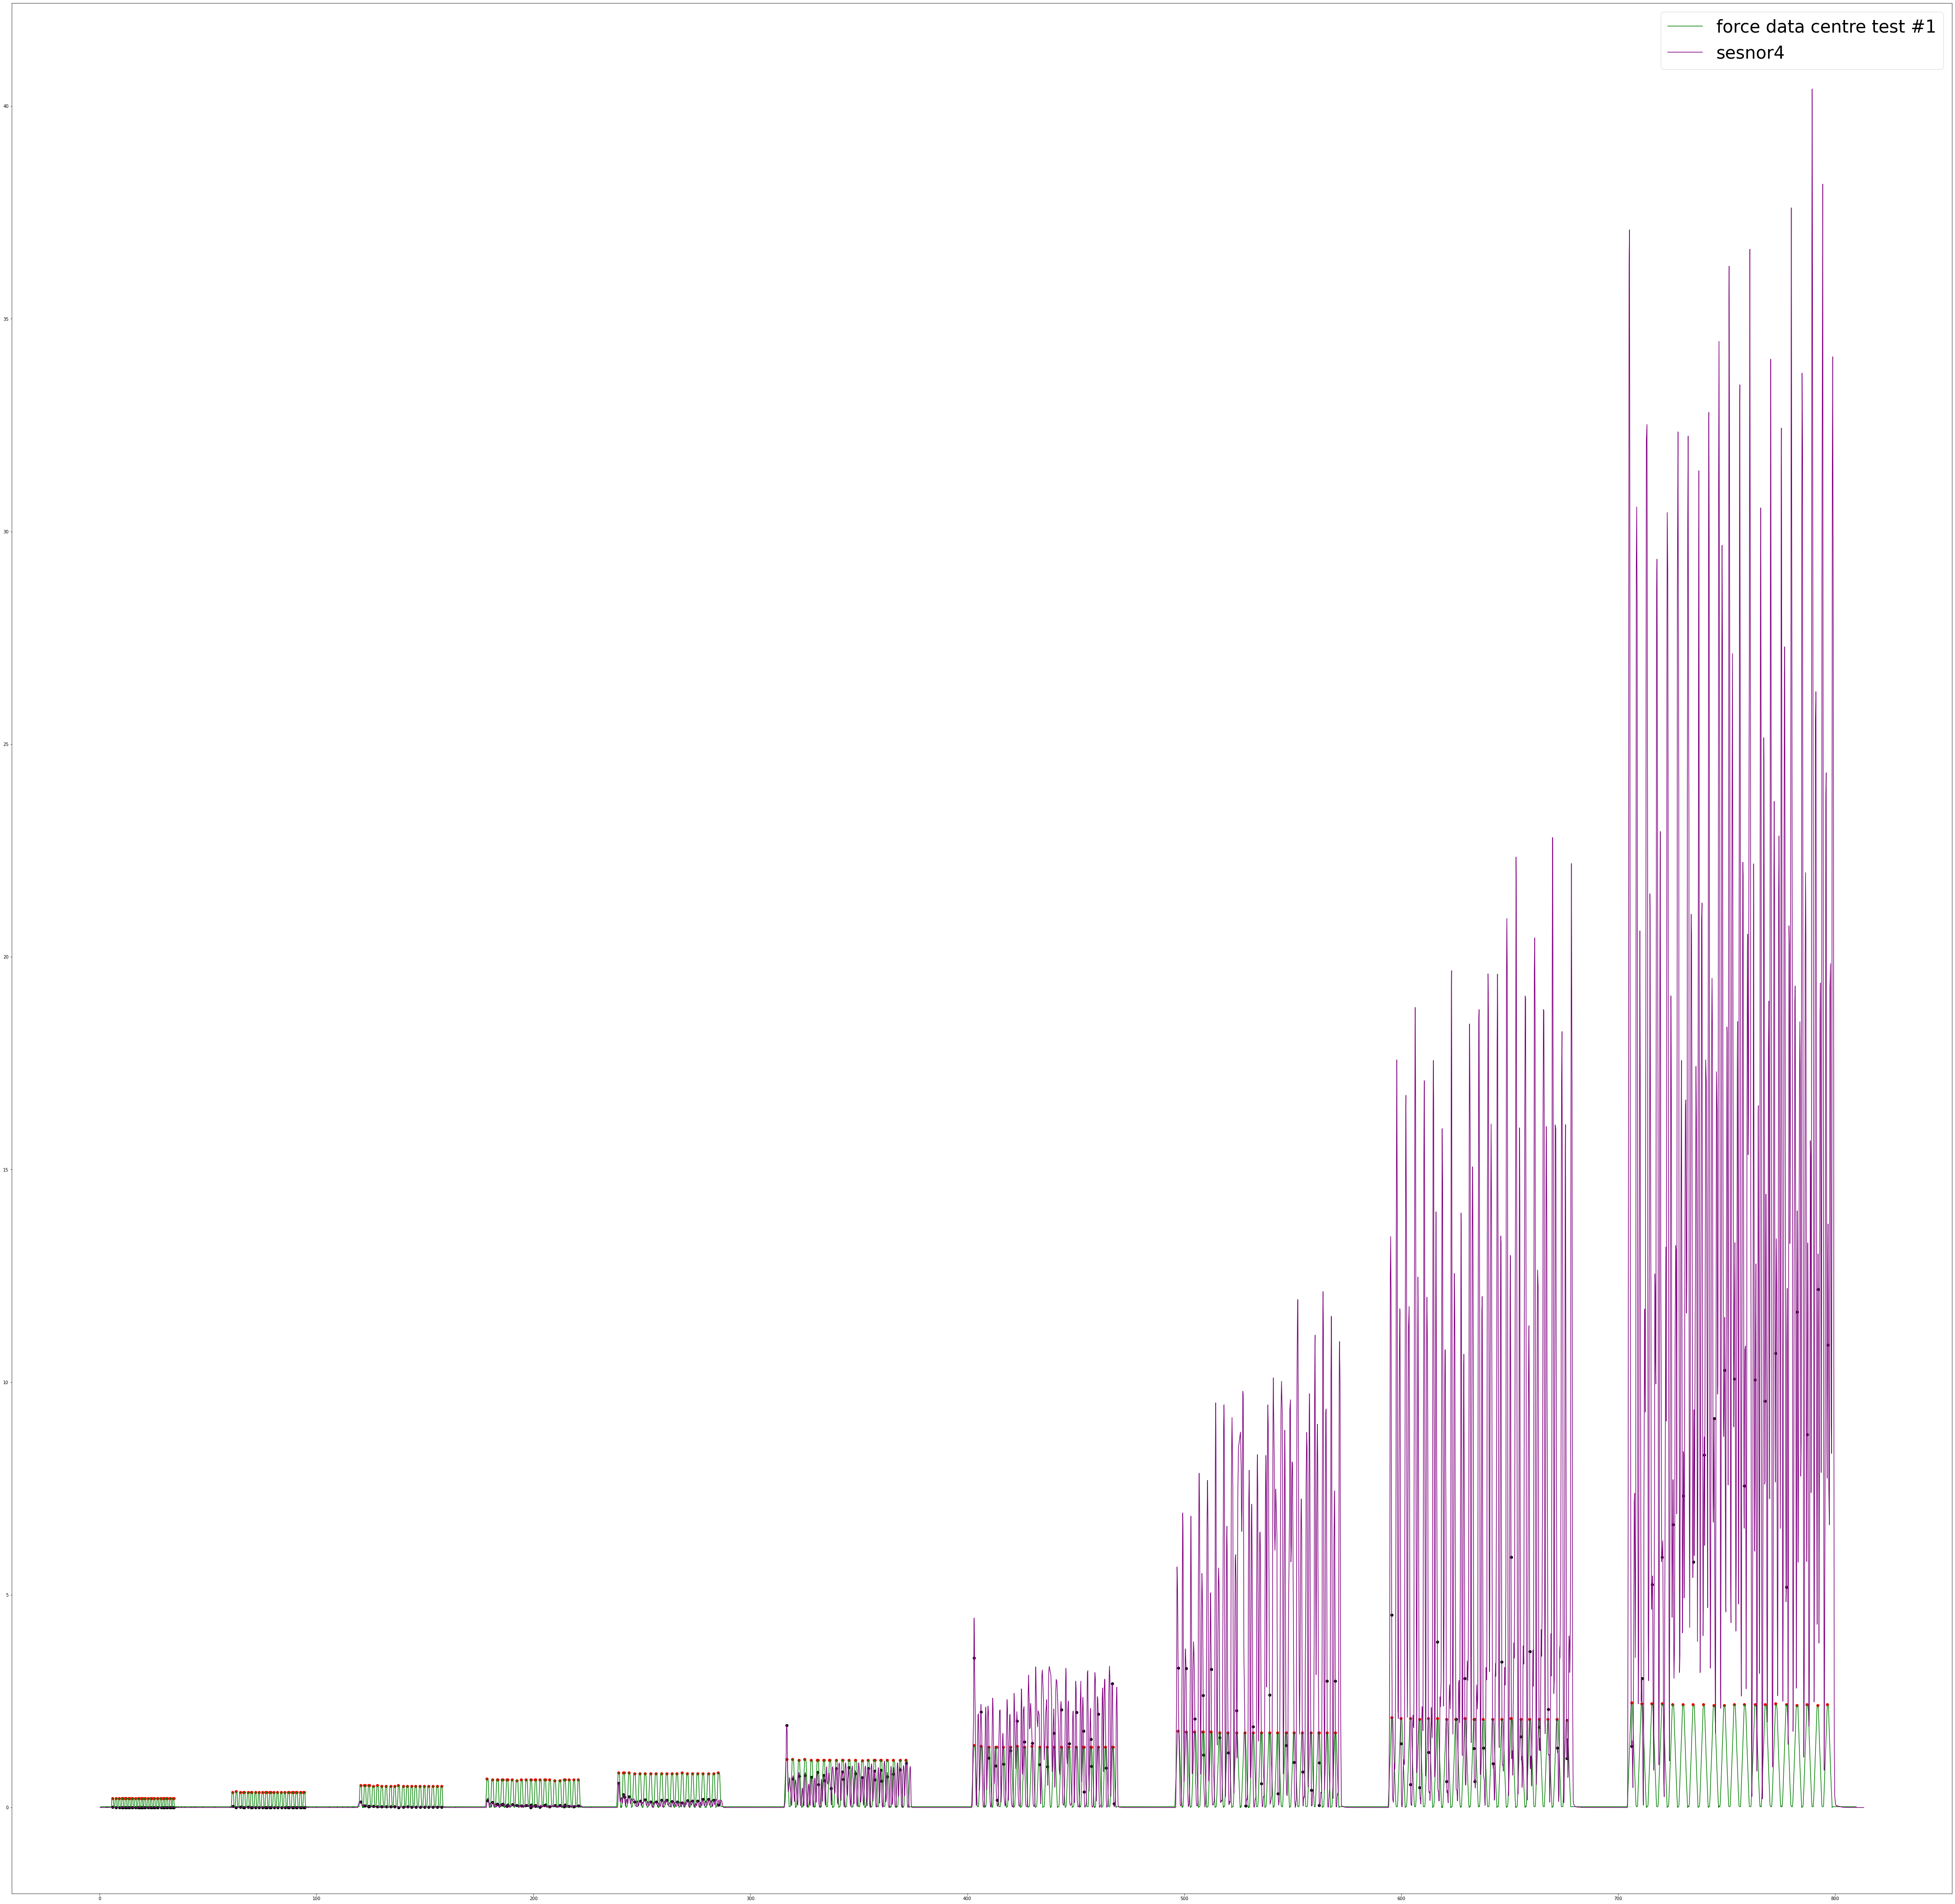

In [28]:
#Scaling the resistance data and the force data to match the force data:
timeshifted_centre = (x_force) + 0.5
scaled_centre = centre["Unnamed: 0"]
#plotting the data together:
plt.figure(figsize=(80, 80))
plt.plot( timeshifted_centre,Load_centre,color = 'green', label = 'force data centre test #1' )
plt.plot(scaled_centre,centre["s4_d"], color = 'purple', label = 'sesnor4')
#plt.plot(centre["Unnamed: 0"],centre["s4_d"], color = 'green', label = 'sesnor4')
plt.legend(fontsize=40)

#finding the peaks

pidx_Load_centre, _ = find_peaks(Load_centre,prominence= 0.05 )
peaks_Load_centre = Load_centre[pidx_Load_centre]
peaks_Ltime_centre = timeshifted_centre[pidx_Load_centre]

plt.scatter(peaks_Ltime_centre,peaks_Load_centre,color = 'red')

# df.iloc[(df['SPY'] - find_it).abs().argsort()[0],:]
idx_centretime = []

peaks_Ltime_centre.reset_index(drop = True, inplace = True)
peaks_Load_centre.reset_index(drop = True, inplace = True)

for i in range(len(peaks_Ltime_centre)):
    idx_centretime.append(bisect.bisect_left(centre["Unnamed: 0"], peaks_Ltime_centre[i]))

plt.scatter(centre["Unnamed: 0"][idx_centretime],centre["s4_d"][idx_centretime],color = 'black')

In [29]:
#Storing the peaks into csv file - W1
Load_centrepeaks =[]

for i in range(len(peaks_Load_centre)):
    Load_centrepeaks.append(peaks_Load_centre[i])
    
content_centre = {'R1':centre["s1_d"][idx_centretime],
              'R2':centre["s2_d"][idx_centretime],
              'R3':centre["s3_d"][idx_centretime],
              'R4':centre["s4_d"][idx_centretime], 
              'Load': Load_centrepeaks} 

df_centre = pd.DataFrame(content_centre, columns = ['R1','R2','R3','R4','Load'])

df_centre.to_csv(r'C:\Users\fatem\Desktop\University\FYP\FK_dummytummy\Peaks_Data\centre.csv',index = False, header = True)

In [7]:
# #Finding the peaks - test #1: Centre - Force
# Order = 4

# #tuple of extrema:
# maxcentre_force = argrelextrema(Load_centre.to_numpy(), np.greater_equal, order =  Order)

# #index the extrema from the original force
# print(np.shape(maxcentre_force))
# maxcentre_force_pts = (Load_centre.iloc[maxcentre_force])

# #creates a new series (one column dataframe ) that has the same indexes from the original force
# maxcentre_force = pd.Series(np.squeeze(maxcentre_force),index = maxcentre_force.index)
# print(np.shape(maxcentre_force))

# #return True or False for each max point
# idxcentre_force = (maxcentre_force_pts>1)

# #Taking the ones that are true (max > 1)
# new_maxcentre_force_pts = maxcentre_force_pts[idxcentre_force]
# new_maxcentre_force = maxcentre_force[idxcentre_force]

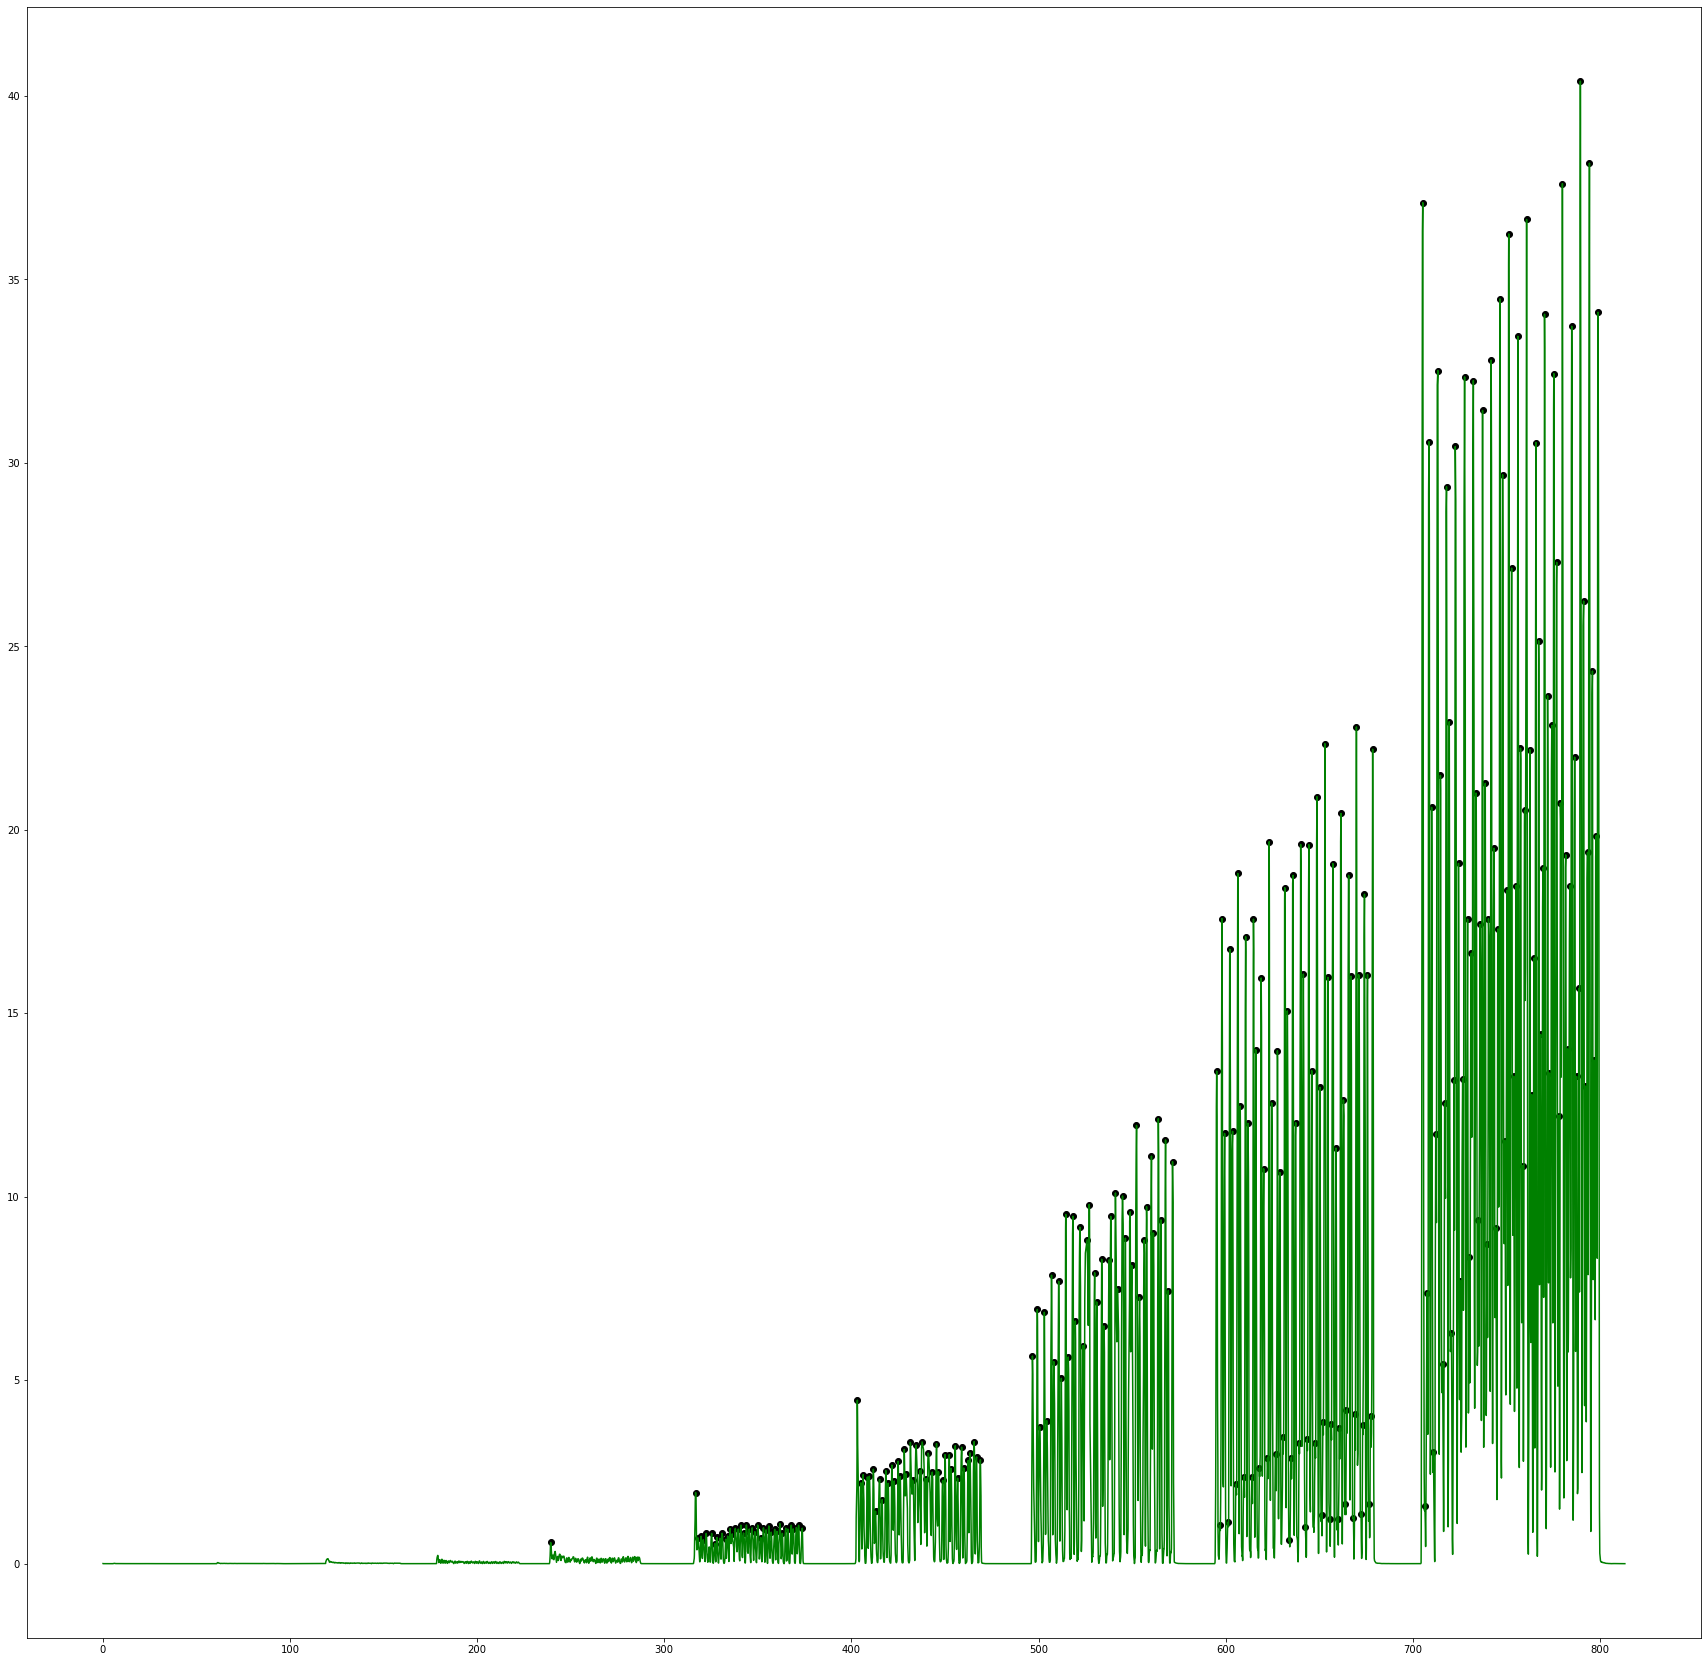

In [8]:
#Finding the peaks for sensor 4
plt.figure(figsize=(30, 30))
centre_s4 = centre["s4_d"]
x_centre= centre["Unnamed: 0"]
centre_peaks4,_ = find_peaks(centre_s4,height = 0.5 , distance = 1)
plt.plot(centre["Unnamed: 0"],centre["s4_d"], color = 'green', label = 'sesnor4')
plt.scatter(x_centre[centre_peaks4],centre_s4[centre_peaks4], color = 'black')

# #Method to use:
# #Finding the peaks for the force data:
# m3 = 3
# #gets a tuple of extrema:
# maximum_f3_3 = argrelextrema(slicedr3_3force.to_numpy(), np.greater_equal, order =  m3)

# # print(np.shape(maximum_f3_2)) #(183)

# #indexes the extrema from the original force
# maxpoints_f3 = (slicedr3_3force.iloc[maximum_f3_3])

# #creates a new series (one column dataframe ) that has the same indexes from the original force
# maximum_f3_3 = pd.Series(np.squeeze(maximum_f3_3),index = maxpoints_f3.index)
# # print(np.shape(maxpoints_f2)) #183

# #return True or False for each max point
# idx3 = (maxpoints_f3>1000)

# #Taking the ones that are true (max > 1000)
# maxpoints_new3 = maxpoints_f3[idx3]
# maximum_f3_new3 = maximum_f3_3[idx3]